In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from datasets import load_dataset
from scipy.stats import chi2_contingency

In [ ]:
ds = load_dataset("sagawa/ZINC-canonicalized")
ds

README.md:   0%|          | 0.00/744 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/786 [00:00<?, ?B/s]

(…)-00000-of-00003-1dd8e62fc2556455.parquet:   0%|          | 0.00/175M [00:00<?, ?B/s]

(…)-00001-of-00003-f5a496221de849aa.parquet:   0%|          | 0.00/175M [00:00<?, ?B/s]

(…)-00002-of-00003-1bb1afcf507d8618.parquet:   0%|          | 0.00/175M [00:00<?, ?B/s]

(…)-00000-of-00001-53255e68092e122d.parquet:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20693269 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2299253 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['smiles'],
        num_rows: 20693269
    })
    validation: Dataset({
        features: ['smiles'],
        num_rows: 2299253
    })
})

In [4]:
zinc_count = {}
smiles = ds["train"]["smiles"] + ds["validation"]["smiles"]
for text in smiles:
    for character in list(text):
        if character in zinc_count:
            zinc_count[character] += 1
        else:
            zinc_count[character] = 1

In [7]:
np.array(list(zinc_count.values()))/sum(zinc_count.values())*100

array([4.47262610e+00, 2.80630643e+00, 1.96720431e+01, 6.45314709e+00,
       3.85494007e+00, 3.26798707e+00, 3.04223022e+00, 2.99563422e+00,
       3.26798707e+00, 8.91711180e-01, 8.50940276e+00, 2.02634615e+01,
       4.31845218e+00, 8.50940276e+00, 3.93656704e-01, 1.60628079e+00,
       2.71320695e+00, 5.24240039e-01, 3.08368043e-01, 3.64089867e-01,
       7.12952157e-01, 1.13821683e-01, 3.47202422e-01, 2.74263042e-01,
       1.00056452e-01, 1.00056452e-01, 6.57265567e-02, 1.60293145e-02,
       2.71352231e-02, 6.41021162e-03, 1.12980926e-03, 3.41660533e-05,
       4.46488196e-06, 3.88250605e-07, 1.16475182e-06, 2.13537833e-06,
       1.94125303e-07])

<BarContainer object of 37 artists>

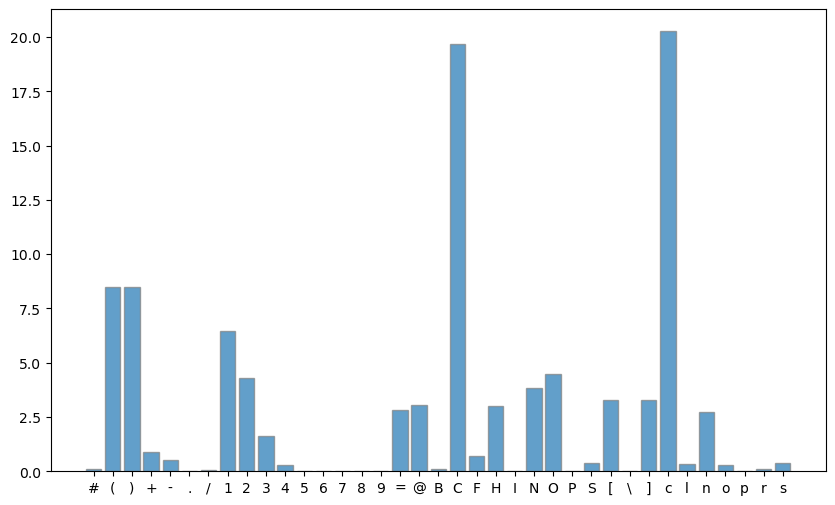

In [ ]:
zinc_count = dict(sorted(zinc_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.bar(zinc_count.keys(), np.array(list(zinc_count.values()))/sum(zinc_count.values())*100, alpha=0.7, edgecolor="grey")

[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20')]

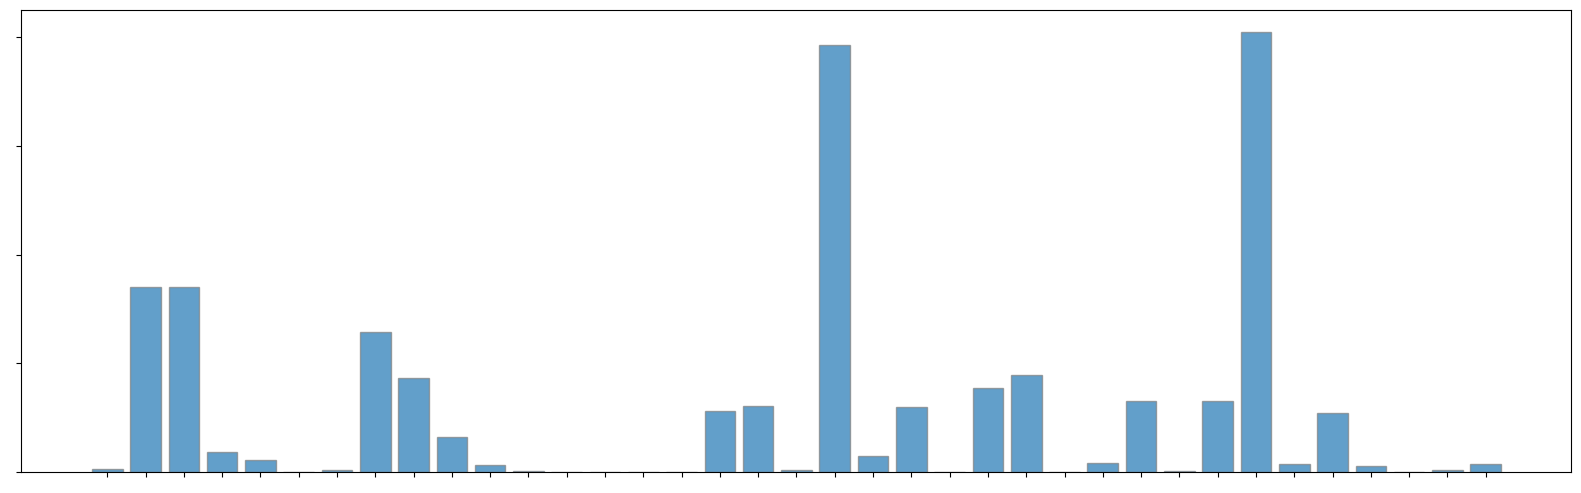

In [16]:
zinc_count = dict(sorted(zinc_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(zinc_count.keys(), np.array(list(zinc_count.values()))/sum(zinc_count.values())*100, alpha=0.7, edgecolor="grey")
axes.set_xticks(range(len(zinc_count)))
axes.set_xticklabels(zinc_count.keys(), alpha=0, fontsize=0)
axes.set_yticks(range(0, 22, 5))
axes.set_yticklabels(range(0, 22, 5), alpha=0, fontsize=0)

In [10]:
ord = pd.concat([pd.read_csv(f"./all_ord_reaction_uniq_with_attr20240506_v3_{split}.csv") for split in ["train", "valid", "test"]])
ord

,id,CATALYST,REACTANT,REAGENT,SOLVENT,INTERNAL_STANDARD,NoData,PRODUCT,YIELD,TEMP
0,ord-b45f2eddde7844199a0384f3f9ed9b3e,NaN,C(=NC1CCCCC1)=NC1CCCCC1.CC(C)(C)OC(=O)CO/N=C(\...,NaN,CC(=O)N(C)C.CC(=O)N(C)C.O,NaN,NaN,CC(C)(C)OC(=O)CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(...,83.0,NaN
1,ord-c7e5a1f8ae464c78babc02d43cb78f73,NaN,CC(C)OC(=O)N=NC(=O)OC(C)C.CCCCC[C@H](O)c1ccc(C...,NaN,C1CCOC1,NaN,NaN,CCCCC[C@@H](OC(=O)c1ccc([N+](=O)[O-])cc1)c1ccc...,63.0,NaN
2,ord-77314c6f17694a36aebf35c12cd3211a,NaN,CC(CN1CCCC1)N1c2ccccc2Sc2ccc(C(N)=S)cc21.CCOC(...,NaN,NaN,NaN,NaN,CC(CN1CCCC1)N1c2ccccc2Sc2ccc(C3=NC4CCCCC4N3)cc21,NaN,NaN
3,ord-60c8bc2894e14e68bad70a37f7315f8b,NaN,CC(C)(C)OC(=O)N(C(=O)[C@@H]1C[C@H](F)CN1)C(C)(...,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@@H]1C[C@H](F)CN1C(=O)[C@@H](O...,NaN,NaN
4,ord-164f0514fbfe45bf82e47f63642b75a0,NaN,CCC=CCCc1cc(Cl)cc(C(=O)OC)c1O,NaN,O=C(O)C(F)(F)F,NaN,NaN,COC(=O)c1cc(Cl)cc2c1O[C@@H]1CCCC[C@@H]21,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...
227434,ord-2889af2d79d44981b3deff1cb0e380a9,NaN,CC(C)(C)OC(=O)Nc1cncc(C(=O)N2CCC(c3cccc(CN(C(=...,NaN,NaN,NaN,NaN,CC(C)(C)OC(=O)N(Cc1cccc(C2CCN(C(=O)c3cncc(N(Cc...,NaN,NaN
227435,ord-198a46ae7f114510a733a320a69456d1,NaN,B.CSC.O=C(O)COCCc1ccc(Br)cc1,NaN,C1CCOC1,NaN,NaN,OCCOCCc1ccc(Br)cc1,81.0,NaN
227436,ord-8e5916d7de784c3580826d326212eea6,NaN,C#CCN1CCCC1.COc1ccc(Nc2ncc3c(n2)-c2ccc(I)cc2NC...,NaN,NaN,NaN,NaN,COc1ccc(Nc2ncc3c(n2)-c2ccc(C#CCN4CCCC4)cc2NC(=...,NaN,NaN
227437,ord-66932398dee34023ace480a221417349,NaN,C1CCOC1.CO.Cc1cn(-c2ccc([N+](=O)[O-])cc2F)cn1....,NaN,NaN,NaN,NaN,Cc1cn(-c2ccc(N)cc2F)cn1,NaN,NaN


In [11]:
ord_count = {}
smiles = ord["CATALYST"].to_list() + ord["REACTANT"].to_list() + ord["REACTANT"].to_list() + ord["REAGENT"].to_list() + ord["SOLVENT"].to_list() + ord["PRODUCT"].to_list()
for text in smiles:
    if isinstance(text, str):
        for character in list(text):
            if character in ord_count:
                ord_count[character] += 1
            else:
                ord_count[character] = 1

<BarContainer object of 69 artists>

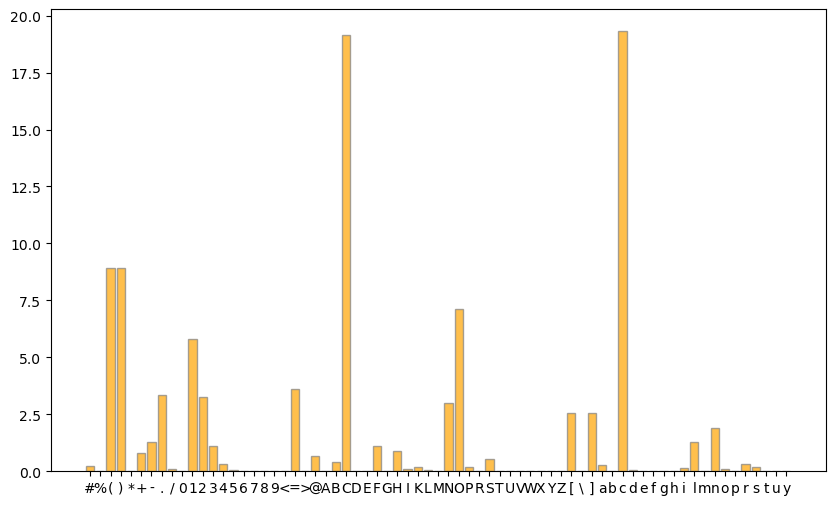

In [18]:
ord_count = dict(sorted(ord_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.bar(ord_count.keys(), np.array(list(ord_count.values()))/sum(ord_count.values())*100, alpha=0.7, edgecolor="grey", color="orange")

[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20')]

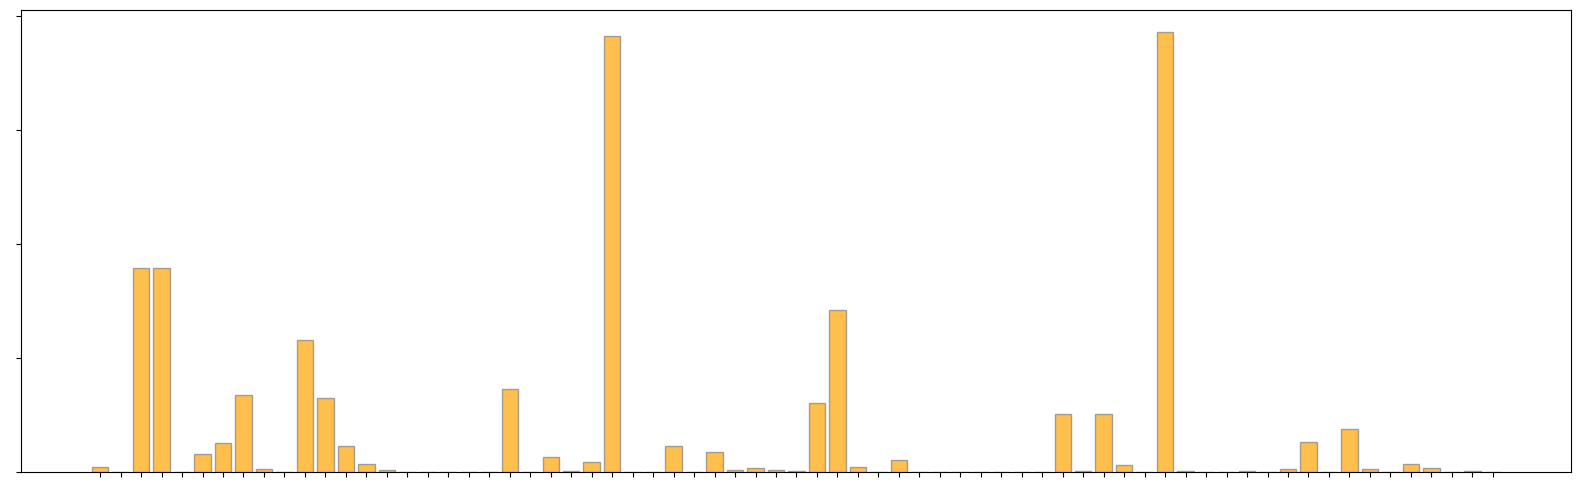

In [19]:
ord_count = dict(sorted(ord_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(ord_count.keys(), np.array(list(ord_count.values()))/sum(ord_count.values())*100, alpha=0.7, edgecolor="grey", color="orange")
axes.set_xticks(range(len(ord_count)))
axes.set_xticklabels(ord_count.keys(), alpha=0, fontsize=0)
axes.set_yticks(range(0, 22, 5))
axes.set_yticklabels(range(0, 22, 5), alpha=0, fontsize=0)

[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20')]

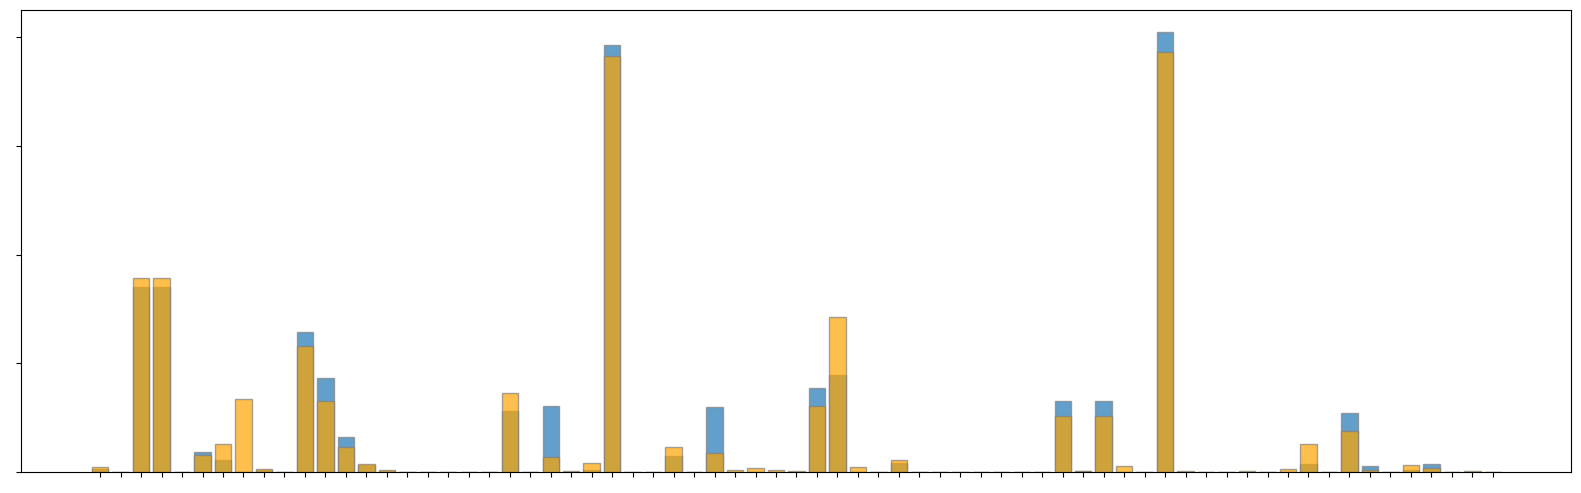

In [30]:
# overlay 2 figs
for key in ord_count.keys():
    if key not in zinc_count:
        zinc_count[key] = 0
zinc_count = dict(sorted(zinc_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(zinc_count.keys(), np.array(list(zinc_count.values()))/sum(zinc_count.values())*100, alpha=0.7, edgecolor="grey")
plt.bar(ord_count.keys(), np.array(list(ord_count.values()))/sum(ord_count.values())*100, alpha=0.7, edgecolor="grey", color="orange")
axes.set_xticks(range(len(ord_count)))
axes.set_xticklabels(ord_count.keys(), alpha=0, fontsize=0)
axes.set_yticks(range(0, 22, 5))
axes.set_yticklabels(range(0, 22, 5), alpha=0, fontsize=0)



In [ ]:
all_keys = sorted(set(zinc_count) | set(ord_count))

table = [
    [zinc_count.get(k, 0) for k in all_keys],
    [ord_count.get(k, 0) for k in all_keys]
]

chi2, p, dof, expected = chi2_contingency(table)
print(f"p値 = {p}")

p値 = 0.0


In [43]:
print(zinc_count)
print(ord_count)

{'#': 1172662, '%': 0, '(': 87669177, ')': 87669177, '*': 0, '+': 9186965, '-': 5401048, '.': 4, '/': 677156, '0': 0, '1': 66484348, '2': 44491389, '3': 16548907, '4': 3177000, '5': 279564, '6': 11640, '7': 352, '8': 22, '9': 2, '<': 0, '=': 28912320, '>': 0, '@': 31342954, 'A': 0, 'B': 1030844, 'C': 202673663, 'D': 0, 'E': 0, 'F': 7345278, 'G': 0, 'H': 30862893, 'I': 66042, 'K': 0, 'L': 0, 'M': 0, 'N': 39715998, 'O': 46079785, 'P': 12, 'R': 0, 'S': 4055697, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0, '[': 33668842, '\\': 165144, ']': 33668842, 'a': 0, 'b': 0, 'c': 208766825, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'l': 3577096, 'm': 0, 'n': 27953151, 'o': 2825629, 'p': 46, 'r': 1030844, 's': 3751081, 't': 0, 'u': 0, 'y': 0}
{'#': 968675, '%': 362, '(': 39570496, ')': 39570496, '*': 1252, '+': 3475620, '-': 5601354, '.': 14920477, '/': 466538, '0': 75, '1': 25627791, '2': 14374586, '3': 4959361, '4': 1500729, '5': 263457, '6': 40522, '7': 8064, '8': 1572, '9': 338, 